In [ ]:
#hide
#skip
! [[ -e /content ]] && git clone https://github.com/chfc-cmi/misas && cd misas && pip install .
import os
if os.path.isdir('/content/misas'):
    os.chdir('/content/misas')

In [ ]:
#hide
from misas.core import *
import warnings
warnings.filterwarnings('ignore')

# Model Interpretation through Sensitivity Analysis for Segmentation

> Interpret and explain your segmetation models through analysing their sensitivity to defined alterations of the input

![](./logo.svg)

Input alterations currently include:
 - rotation
 - cropping
 - brightness
 - contrast
 - zooming
 - flipping (dihedral)
 - resizing
 - MR artifacts (via [`torchio`](https://github.com/fepegar/torchio))

## Install

`pip install misas`

## Cite

If you use `misas` in your research, please cite:
> Ankenbrand, M. J., Shainberg, L., Hock, M., Lohr, D., & Schreiber, L. M. Sensitivity analysis for interpretation of machine learning based segmentation models in cardiac MRI. BMC Medical Imaging, 21(27). https://doi.org/10.1186/s12880-021-00551-1

If you use the simulated MR artifacts, please also cite `torchio`:
> F. Pérez-García, R. Sparks, and S. Ourselin. TorchIO: a Python library for efficient loading, preprocessing, augmentation and patch-based sampling of medical images in deep learning. Computer Methods and Programs in Biomedicine (June 2021), p. 106236. ISSN: 0169-2607. https://doi.org/10.1016/j.cmpb.2021.106236

## How to use

Example with kaggle data

In [ ]:
from misas.core import *
from misas.core import default_cmap, default_cmap_true_mask
from misas.fastai_model import Fastai2_model
from PIL import Image, ImageEnhance, ImageOps
from functools import partial
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def label_func(x):
    pass
def acc_seg(input, target):
    pass
def diceComb(input, targs):
    pass
def diceLV(input, targs):
    pass
def diceMY(input, targs):
    pass

Using cache found in /home/csa84mikl/.cache/torch/hub/chfc-cmi_cmr-seg-tl_master


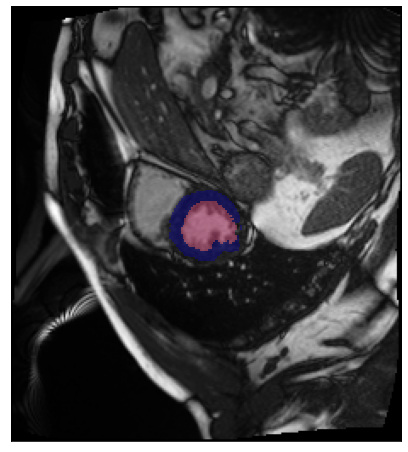

In [ ]:
#hide_output
img = lambda: Image.open("example/kaggle/images/1-frame014-slice005.png").convert("RGB")
trueMask = lambda: Image.open("example/kaggle/masks/1-frame014-slice005.png").convert("I")
trainedModel = Fastai2_model("chfc-cmi/cmr-seg-tl", "cmr_seg_base", force_reload=False)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(np.array(img()))
ax.imshow(np.array(trueMask()), cmap=default_cmap_true_mask, alpha=.5, interpolation="nearest")
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

### Rotation

  0%|          | 0/7 [00:00<?, ?it/s]

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


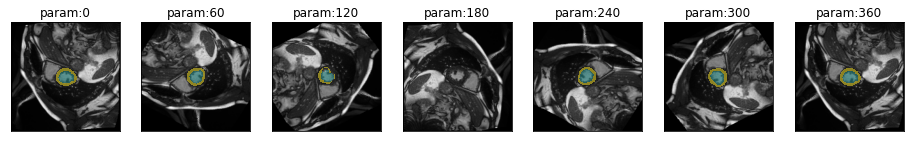

In [ ]:
plot_series(get_rotation_series(img(), trainedModel))

  0%|          | 0/72 [00:00<?, ?it/s]

(0.0, 360.0, 0.0, 1.0)

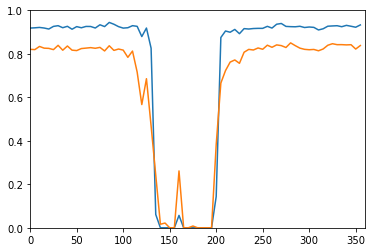

In [ ]:
results = eval_rotation_series(img(), trueMask(), trainedModel)
plt.plot(results['deg'], results['c1'])
plt.plot(results['deg'], results['c2'])
plt.axis([0,360,0,1])

You can use interactive elements to manually explore the impact of rotation

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
rotation_series = get_rotation_series(img(),trainedModel,step=10)

  0%|          | 0/37 [00:00<?, ?it/s]

In [ ]:
def plot_rotation_frame(deg):
    return plot_frame(*rotation_series[int(deg/10)], figsize=(10,10))

In [ ]:
#hide_output
interact(
    plot_rotation_frame,
    deg=widgets.IntSlider(min=0, max=360, step=10, value=90, continuous_update=False)
)

interactive(children=(IntSlider(value=90, continuous_update=False, description='deg', max=360, step=10), Outpu…

<function __main__.plot_rotation_frame(deg)>

There are lots of other transformations to try (e.g. cropping, brightness, contrast, ...) as well as MR specific artifacts.

## Overview

This is the schematic overview of how `misas` works. Created with the amazing [Excalidraw](https://excalidraw.com/).
![schema](schema.svg)

## Logo

The logo was designed by Markus J. Ankenbrand using:
 - [Open box / Boite ouverte](https://openclipart.org/detail/29155/open-box-boite-ouverte) by [SimpleIcons](https://openclipart.org/artist/SimpleIcons) via [openclipart.org](https://openclipart.org)
 - [Cutter icon](https://openclipart.org/detail/213227/cutter-icon) by [SimpleIcons](https://openclipart.org/artist/SimpleIcons) via [openclipart.org](https://openclipart.org), original by Marco Olgio, via [WikiMedia](commons.wikimedia.org/wiki/File:Utility_Knife_by_Marco_Olgio.svg)
 - [Hack Font](https://sourcefoundry.org/hack/)
 - [Inkscape](https://inkscape.org)
 
![](./logo.svg)

## Attribution

This project is inspired by the awesome ["Is it a Duck or Rabbit" tweet](https://twitter.com/minimaxir/status/1103676561809539072) by [@minimaxir](https://twitter.com/minimaxir). Also check out the [corresponding repo](https://github.com/minimaxir/optillusion-animation).


In [ ]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Is it a Duck or a Rabbit? For Google Cloud Vision, it depends how the image is rotated. <a href="https://t.co/a30VzjEXVv">pic.twitter.com/a30VzjEXVv</a></p>&mdash; Max Woolf (@minimaxir) <a href="https://twitter.com/minimaxir/status/1103676561809539072?ref_src=twsrc%5Etfw">March 7, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 